In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data

In [ ]:
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
clf1 = setup(data=data, target='default', session_id=123,
             normalize=True,  # 데이터 정규화
             remove_outliers=True)  # 이상치 제거

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(23160, 24)"
5,Transformed train set shape,"(15960, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# 여러 모델을 학습시키고 성능 비교, 가장 좋은 성능을 보이는 모델 선택
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8207,0.6297,0.3796,0.6660,0.4832,0.3845,0.4069,5.8960
lightgbm,Light Gradient Boosting Machine,0.8199,0.6603,0.3716,0.6662,0.4767,0.3785,0.4021,3.6030
ada,Ada Boost Classifier,0.8176,0.6840,0.3349,0.6772,0.4479,0.3534,0.3850,1.5240
lda,Linear Discriminant Analysis,0.8129,0.7061,0.2886,0.6832,0.4055,0.3155,0.3571,0.3620
rf,Random Forest Classifier,0.8117,0.4542,0.3651,0.6285,0.4613,0.3568,0.3765,4.6510
lr,Logistic Regression,0.8101,0.7066,0.2539,0.6941,0.3714,0.2869,0.3377,1.2260
xgboost,Extreme Gradient Boosting,0.8096,0.4824,0.3600,0.6197,0.4553,0.3496,0.3686,0.7170
et,Extra Trees Classifier,0.8084,0.7049,0.3640,0.6130,0.4565,0.3492,0.3669,2.2560
ridge,Ridge Classifier,0.8021,0.0000,0.1731,0.7192,0.2787,0.2110,0.2841,0.3380
svm,SVM - Linear Kernel,0.8014,0.0000,0.2293,0.6605,0.3202,0.2423,0.2908,0.5030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8119,0.7574,0.2695,0.6897,0.3876,0.3008,0.3474
1,0.8095,0.7095,0.2534,0.6861,0.3701,0.2849,0.3342
2,0.8107,0.7223,0.2399,0.7120,0.3589,0.2786,0.3357
3,0.8149,0.7621,0.2561,0.7308,0.3792,0.2989,0.3560
4,0.8143,0.7291,0.2264,0.7706,0.3500,0.2775,0.3491
5,0.8113,0.6947,0.2722,0.6824,0.3892,0.3012,0.3459
6,0.8202,0.7145,0.2930,0.7365,0.4192,0.3355,0.3856
7,0.8161,0.7263,0.2688,0.7299,0.3929,0.3108,0.3649
8,0.8113,0.7394,0.2446,0.7165,0.3647,0.2840,0.3410


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8124,0.7635,0.3417,0.6423,0.4461,0.3456,0.3706


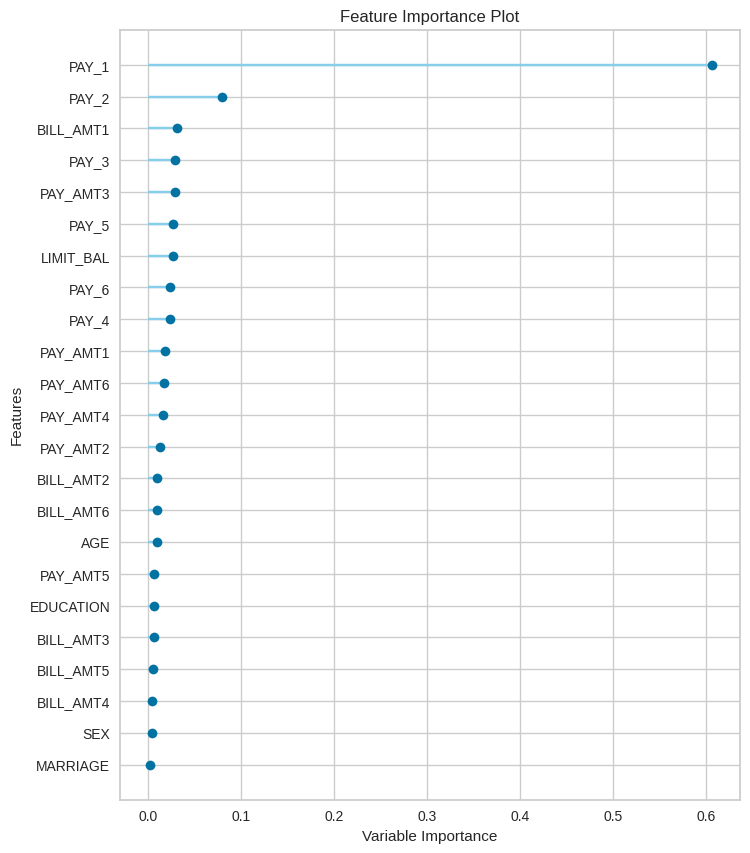

In [ ]:
# 특성 중요도 시각화
plot_model(tuned_model, plot = 'feature_all')